In [ ]:

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import pickle as pkl

import numpy as np

from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier

from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
    from google.colab import files

In [ ]:
    uploaded = files.upload()

Saving HealthCareData.xlsx to HealthCareData.xlsx


In [ ]:
dataset = pd.read_excel('HealthCareData.xlsx')
dataset.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
dataset.shape

(950, 42)

In [ ]:
dataset.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [ ]:
dataset.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [ ]:

dataset.columns = ['s_no', 'age', 'gender', 'place', 'alcohol_duration', 'alcohol_quantity',
                   'alcohol_type', 'hepatitis_b', 'hepatitis_c', 'diabetes', 'blood_pressure',
                   'obesity', 'family_history', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt',
                   'usg_abdomen', 'predicted_value']
binary_mapping = {'YES': 1, 'NO': 0, 'yes':1, 'no': 0}
for col in ['hepatitis_b', 'hepatitis_c', 'diabetes', 'obesity', 'family_history']:
    dataset[col] = dataset[col].map(binary_mapping).fillna(0)  # Fills NaN with 0

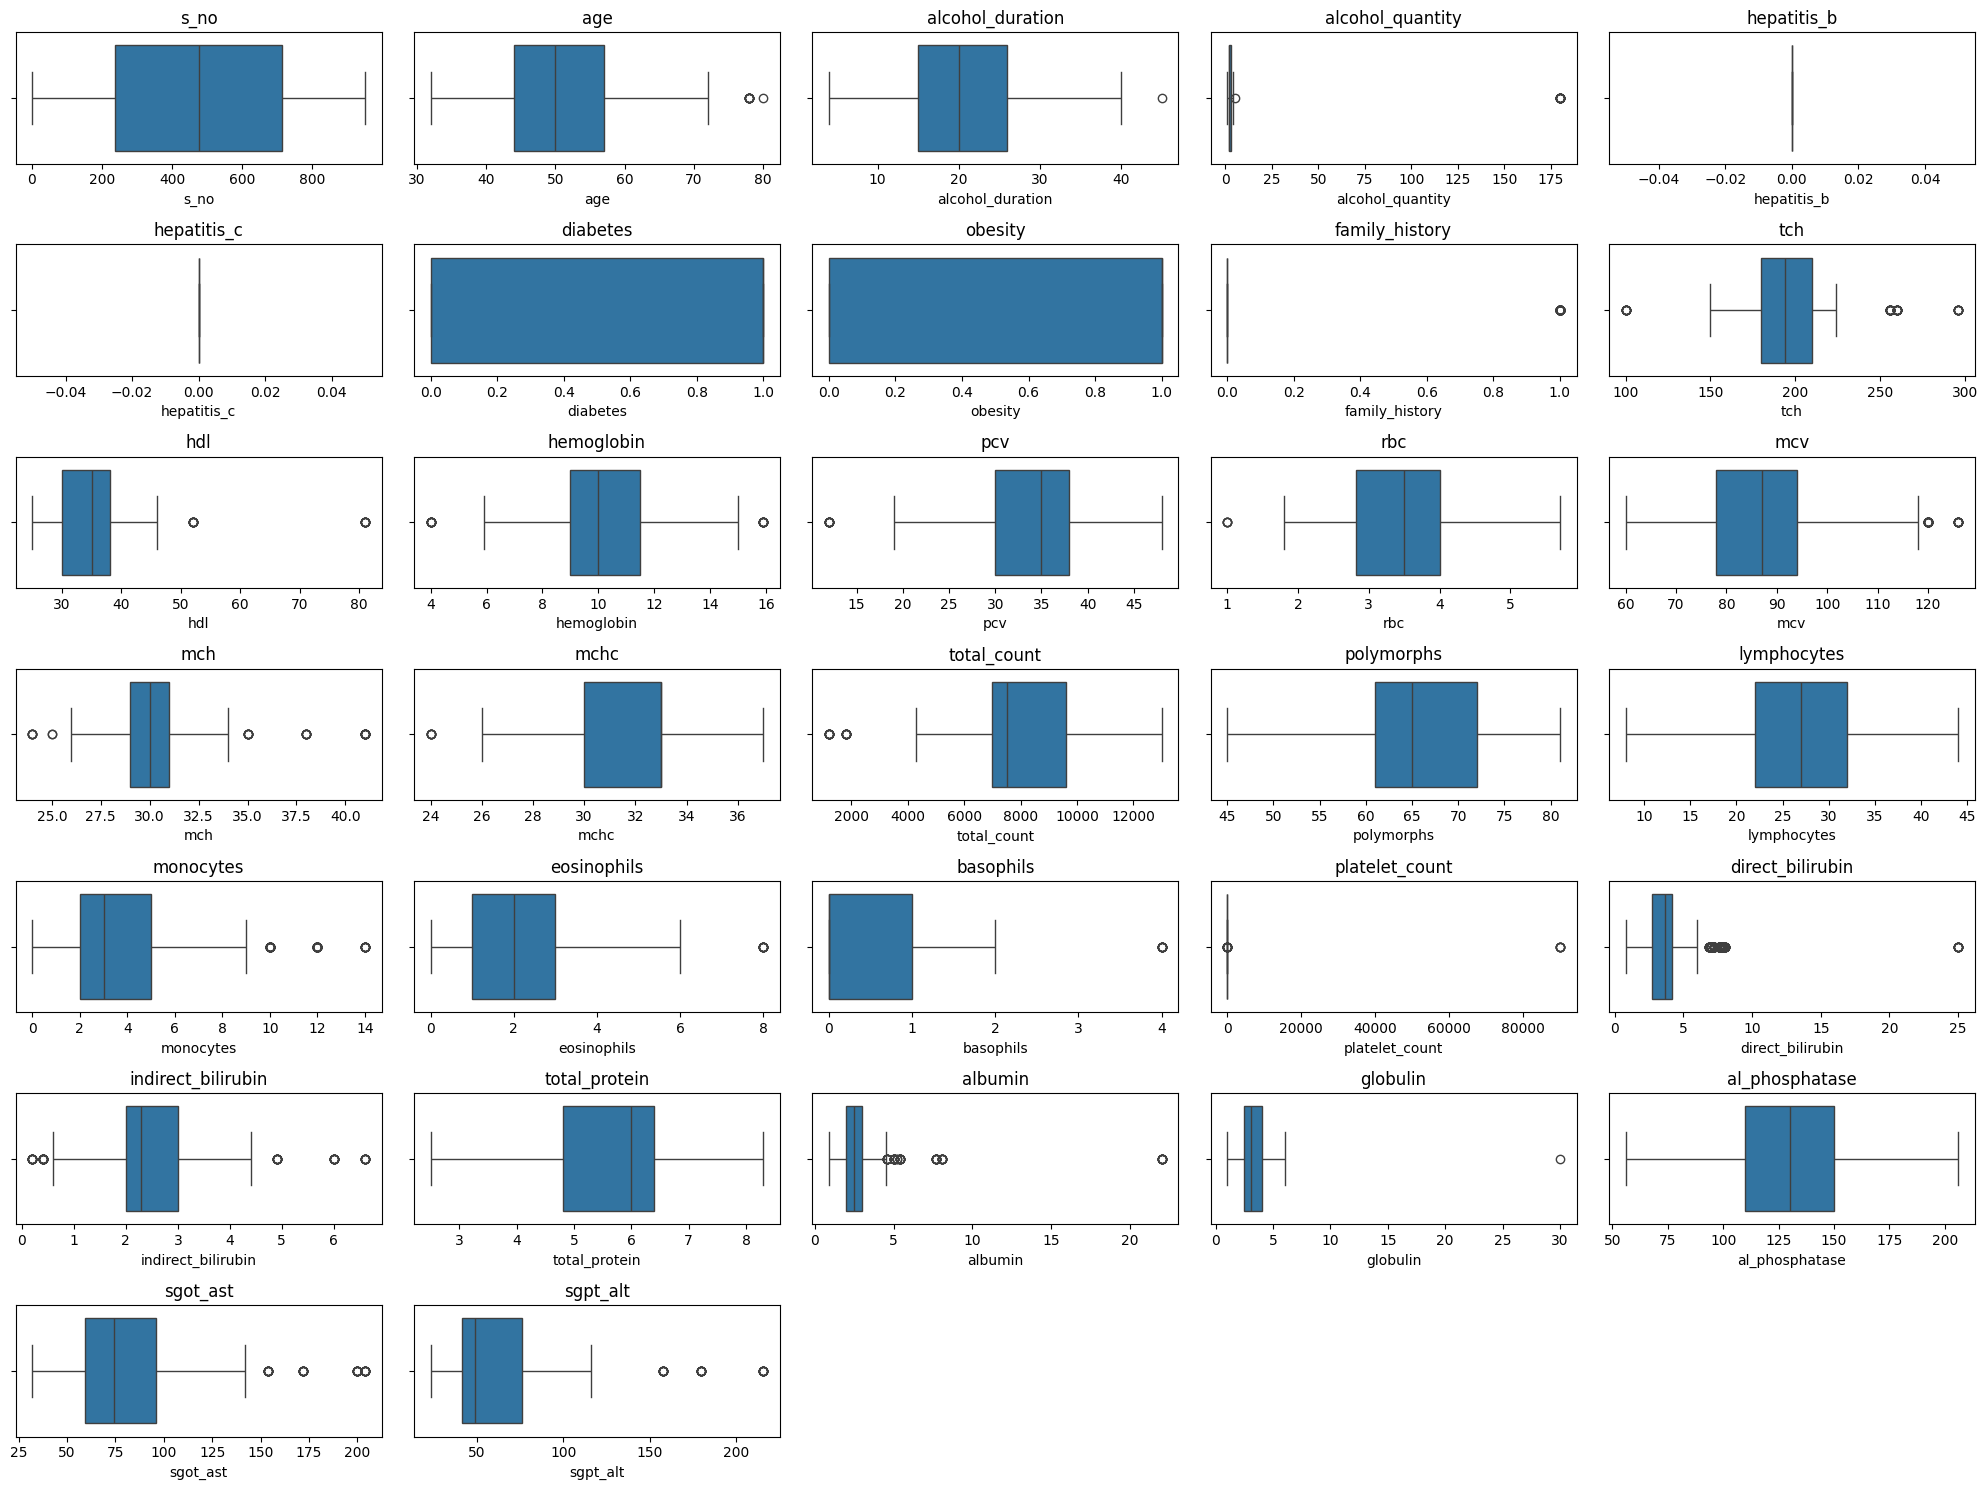

In [ ]:


c = 0
plt.figure(figsize=(20, 15))

for i, column in enumerate(dataset.columns):
    if pd.api.types.is_numeric_dtype(dataset[column]):
        try:
            plt.subplot(7, 5, c + 1)

            sns.boxplot(x=dataset[column])

            plt.title(column)

            c += 1
        except Exception as e:
          print(f"Skipping plot for column {column} due to error: {e}")


plt.tight_layout()
plt.show()

In [ ]:
print(dataset.columns)

Index(['s_no', 'age', 'gender', 'place', 'alcohol_duration',
       'alcohol_quantity', 'alcohol_type', 'hepatitis_b', 'hepatitis_c',
       'diabetes', 'blood_pressure', 'obesity', 'family_history', 'tch', 'tg',
       'ldl', 'hdl', 'hemoglobin', 'pcv', 'rbc', 'mcv', 'mch', 'mchc',
       'total_count', 'polymorphs', 'lymphocytes', 'monocytes', 'eosinophils',
       'basophils', 'platelet_count', 'total_bilirubin', 'direct_bilirubin',
       'indirect_bilirubin', 'total_protein', 'albumin', 'globulin',
       'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt', 'usg_abdomen',
       'predicted_value'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd

# Calculate quartiles and IQR
q1 = dataset['eosinophils'].quantile(0.25)
q3 = dataset['eosinophils'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower limits for outlier detection
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")

# Cap the outliers
dataset['eosinophils'] = np.where(dataset['eosinophils'] > upper_limit, upper_limit,
                                   np.where(dataset['eosinophils'] < lower_limit, lower_limit,
                                            dataset['eosinophils']))

Lower limit: -2.0, Upper limit: 6.0


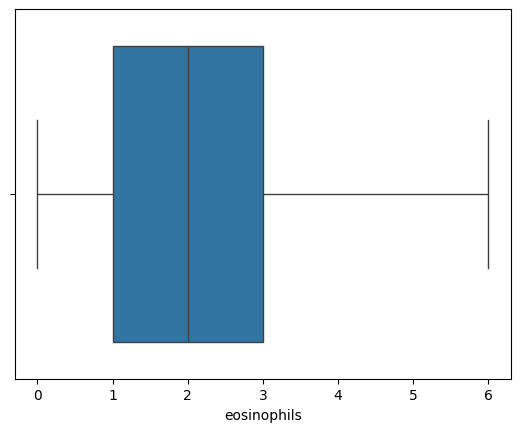

In [ ]:


sns.boxplot(x=dataset['eosinophils'])
plt.show()

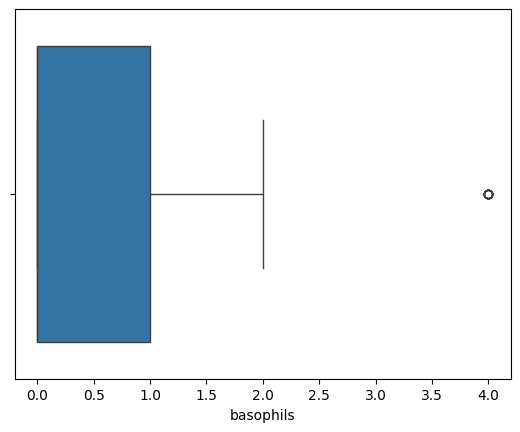

In [ ]:
sns.boxplot(x=dataset['basophils'])
plt.show()

In [ ]:


# Calculate quartiles and IQR
q1 = dataset['basophils'].quantile(0.25)
q3 = dataset['basophils'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower limits for outlier detection
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")

# Cap the outliers
dataset['basophils'] = np.where(dataset['basophils'] > upper_limit, upper_limit,
                                   np.where(dataset['basophils'] < lower_limit, lower_limit,
                                            dataset['basophils']))

Lower limit: -1.5, Upper limit: 2.5


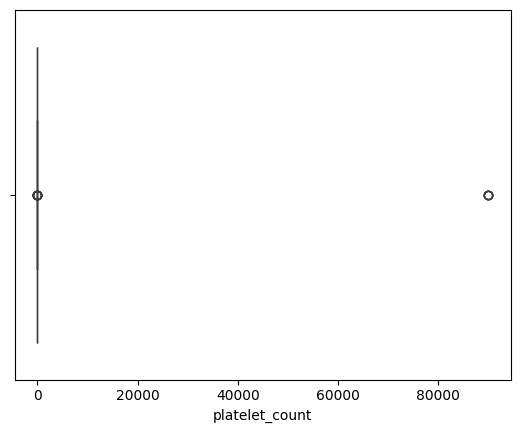

In [ ]:

sns.boxplot(x=dataset['platelet_count'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your data into 'dataset' and renamed the columns
# Assuming 'predicted_value' is your target variable
x = dataset.drop('predicted_value', axis=1)  # All columns except target
y = dataset['predicted_value']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (760, 41)
X_test shape: (190, 41)
Y_train shape: (760,)
Y_test shape: (190,)


In [ ]:
dataset.describe()

,s_no,age,alcohol_duration,alcohol_quantity,hepatitis_b,hepatitis_c,diabetes,obesity,family_history,tch,...,basophils,platelet_count,direct_bilirubin,indirect_bilirubin,total_protein,albumin,globulin,al_phosphatase,sgot_ast,sgpt_alt
count,950.000000,950.000000,950.000000,950.000000,950.0,950.0,950.000000,950.000000,950.000000,591.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,0.0,0.0,0.681053,0.577895,0.070526,197.544839,...,0.481909,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,0.0,0.0,0.466314,0.494155,0.256167,26.694968,...,0.644771,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,100.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,180.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,0.0,0.0,1.000000,1.000000,0.000000,194.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,0.0,0.0,1.000000,1.000000,0.000000,210.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,0.0,0.0,1.000000,1.000000,1.000000,296.000000,...,2.500000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


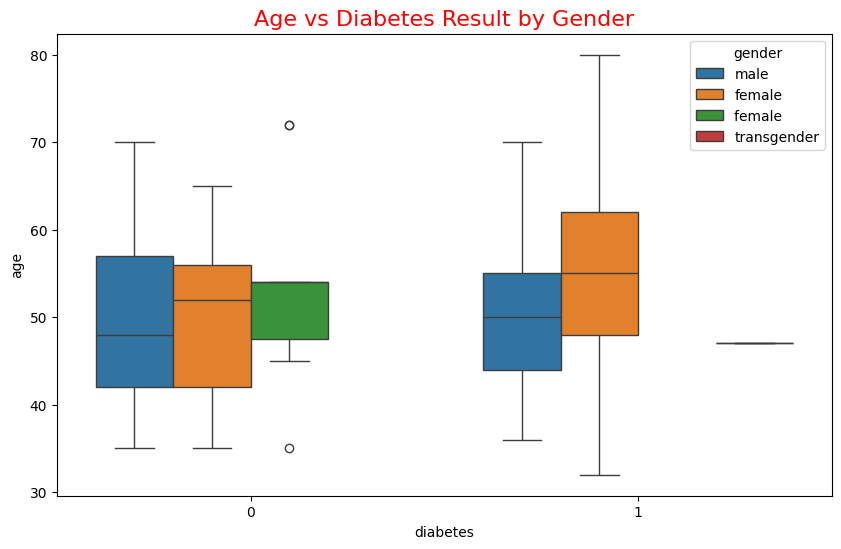

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='diabetes', y='age', data=dataset, hue='gender')
plt.title('Age vs Diabetes Result by Gender', color='red', fontsize = 16) #reduced font size
plt.show()

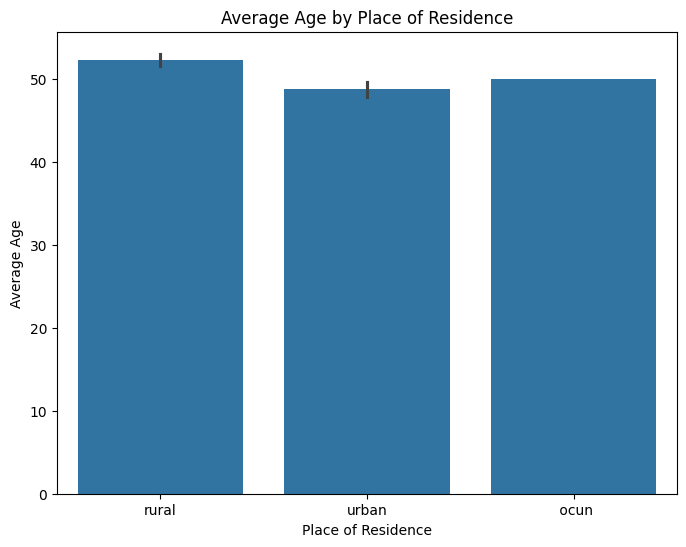

In [ ]:

plt.figure(figsize=(8,6))
sns.barplot(x=dataset['place'], y=dataset['age'])
plt.title('Average Age by Place of Residence') #Added plot title
plt.xlabel('Place of Residence')# Added x label
plt.ylabel('Average Age') #Added y label
plt.show()

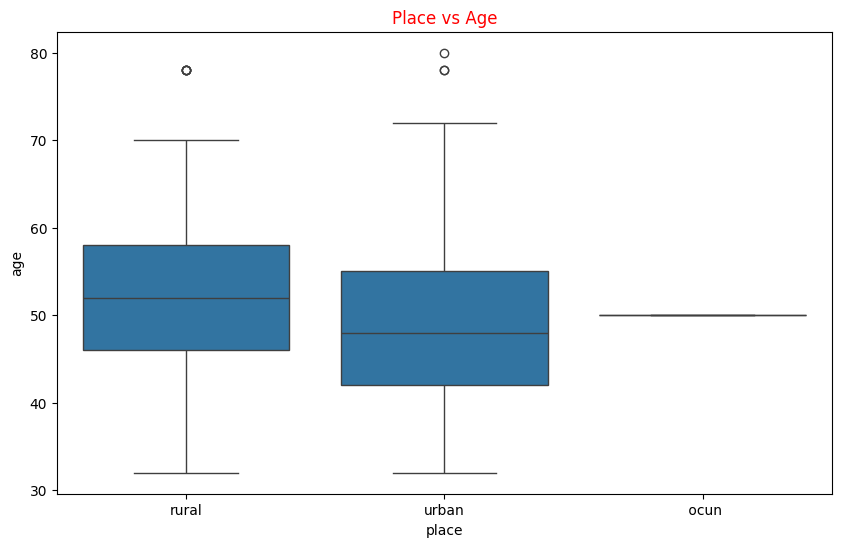

In [ ]:


plt.figure(figsize=(10, 6))

sns.boxplot(x=dataset['place'], y=dataset['age'], data=dataset)
plt.title('Place vs Age', color='red', fontsize=12)

plt.show()

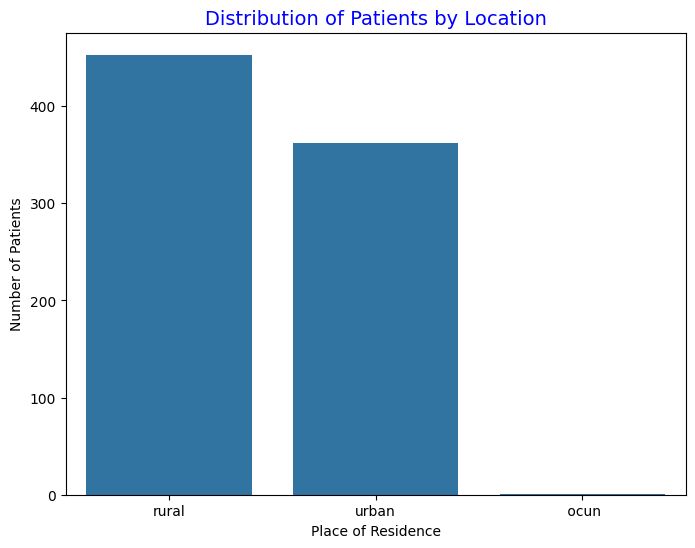

In [ ]:


plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='place')
plt.title("Distribution of Patients by Location", color='blue', fontsize=14, loc='center')
plt.xlabel('Place of Residence')
plt.ylabel('Number of Patients')
plt.show()

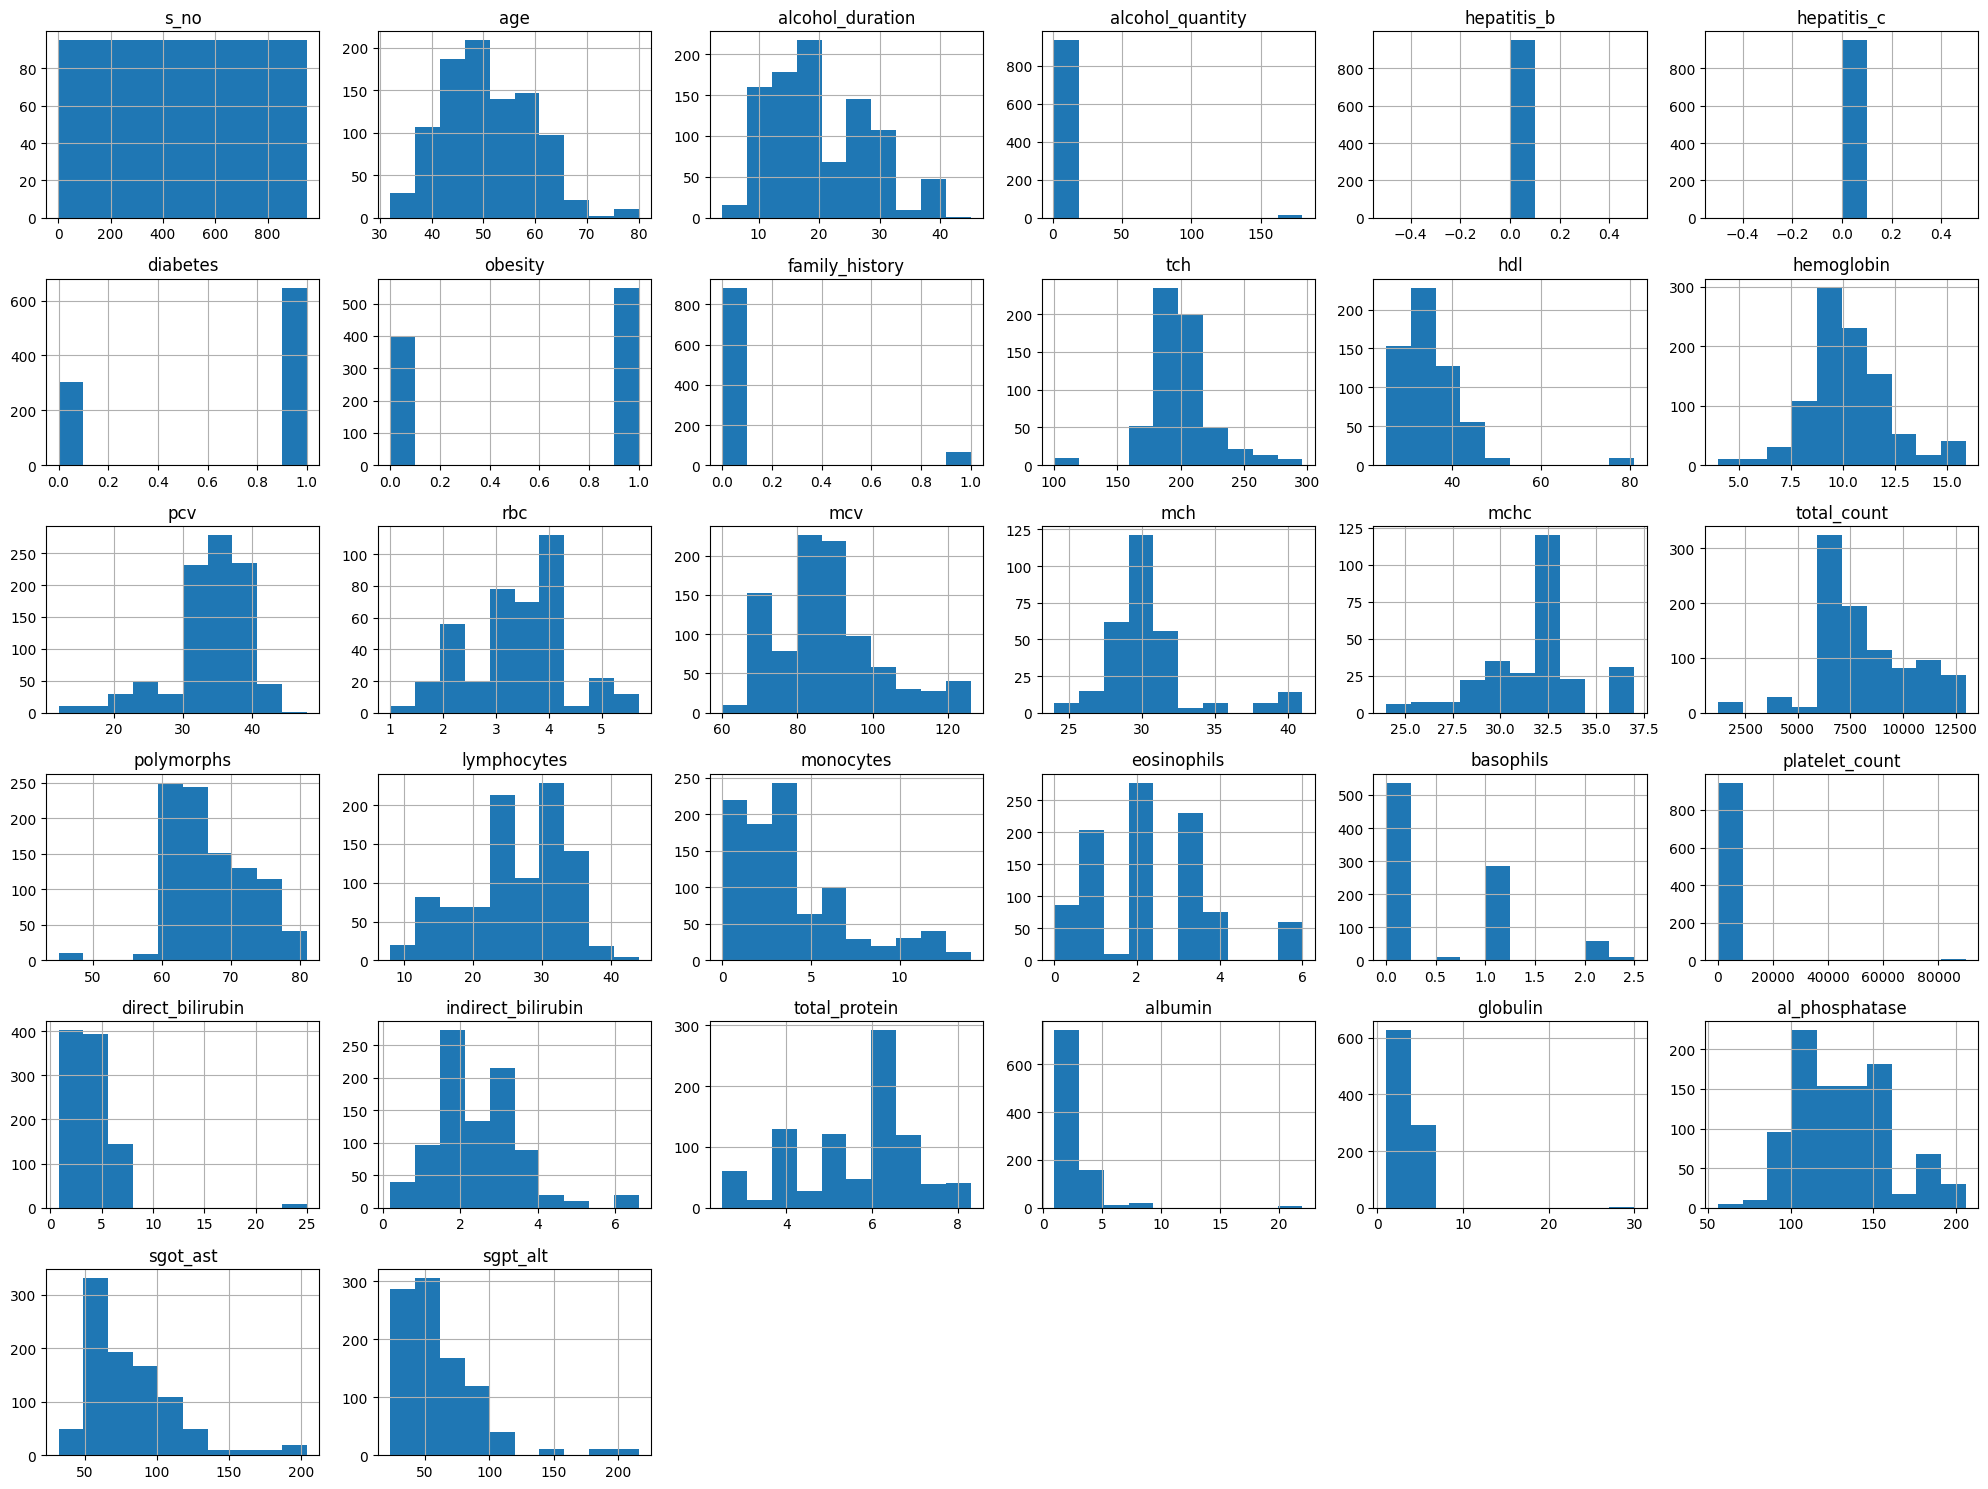

In [ ]:


# Visualization of Numerical Data chart-1

numerical_cols = dataset.select_dtypes(include=np.number).columns

dataset[numerical_cols].hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

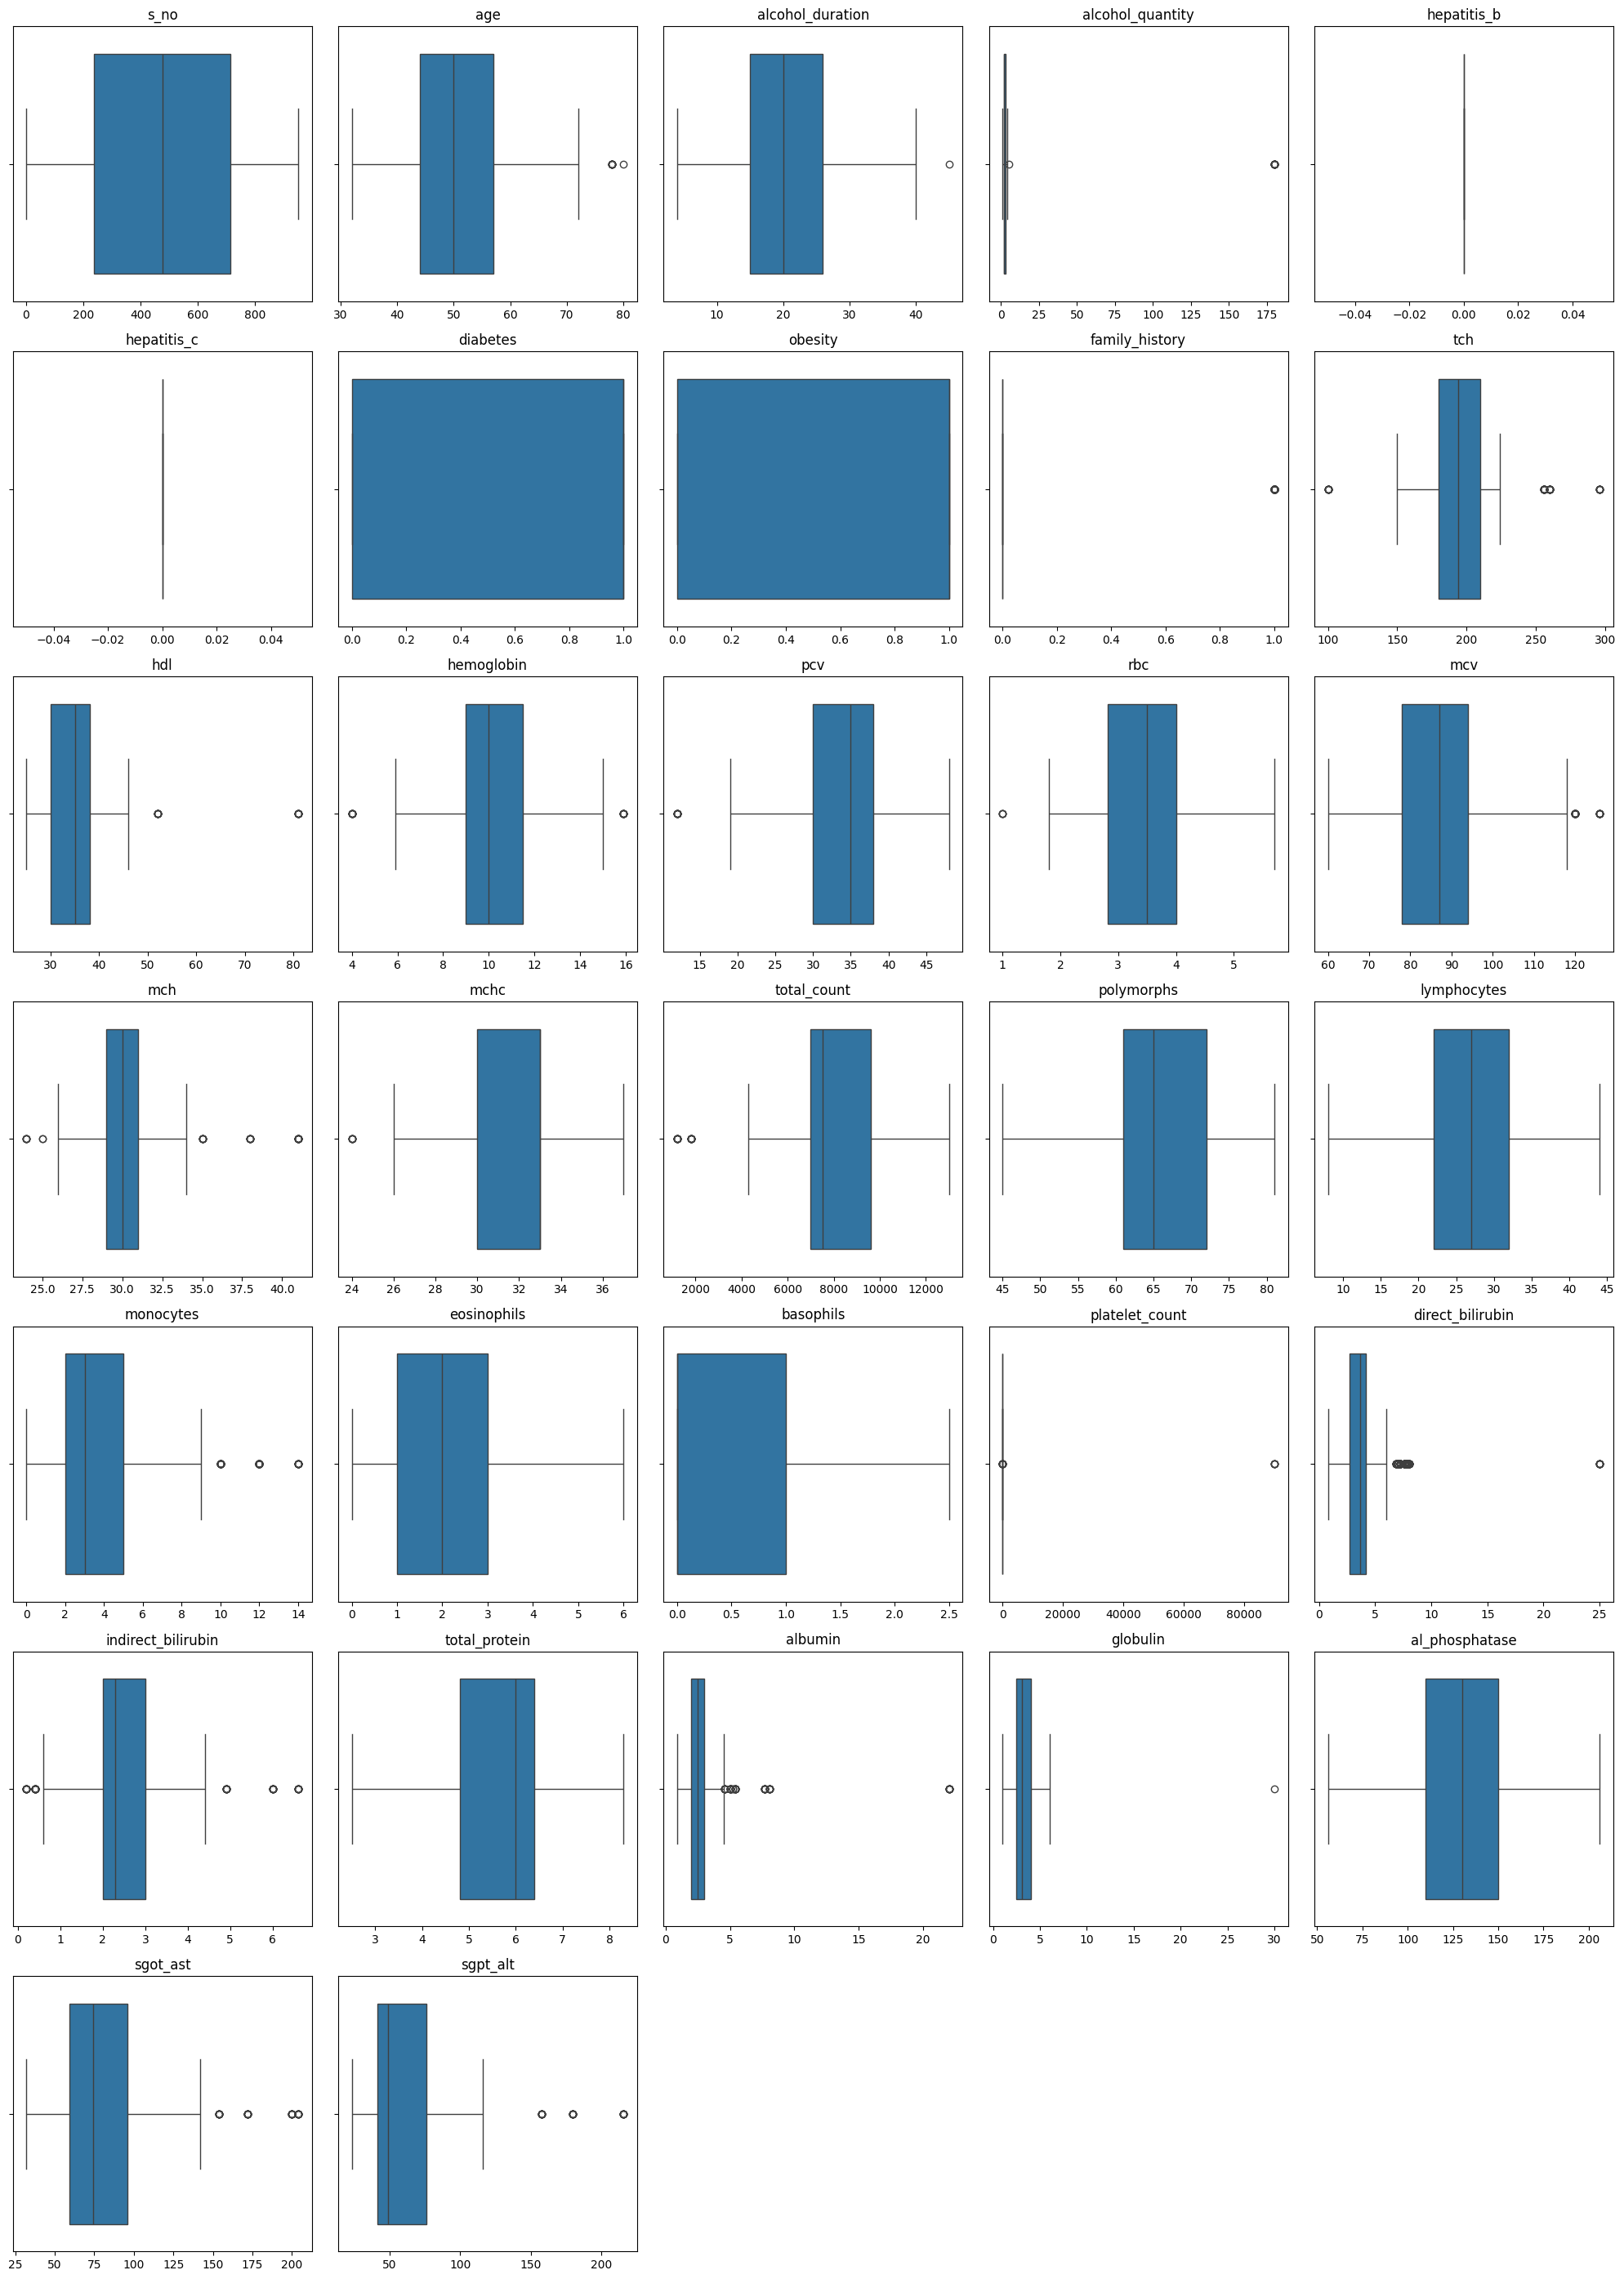

In [ ]:

numerical_cols = dataset.select_dtypes(include=np.number).columns

# Determine number of rows and columns for subplots dynamically
num_cols = len(numerical_cols)
num_rows = (num_cols + 4) // 5  # Integer division to get the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4 * num_rows)) # Adjusted fig size
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each numerical column
for i, column in enumerate(numerical_cols):
    try:
        sns.boxplot(x=dataset[column], ax=axes[i])  # Plot on the corresponding subplot
        axes[i].set_title(column)
        axes[i].set_xlabel("")  # Remove x label

    except Exception as e:
        print(f"Skipping plot for column {column} due to error: {e}")
        axes[i].axis('off')  # Turn off the subplot if there's an error

# Turn off any unused subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

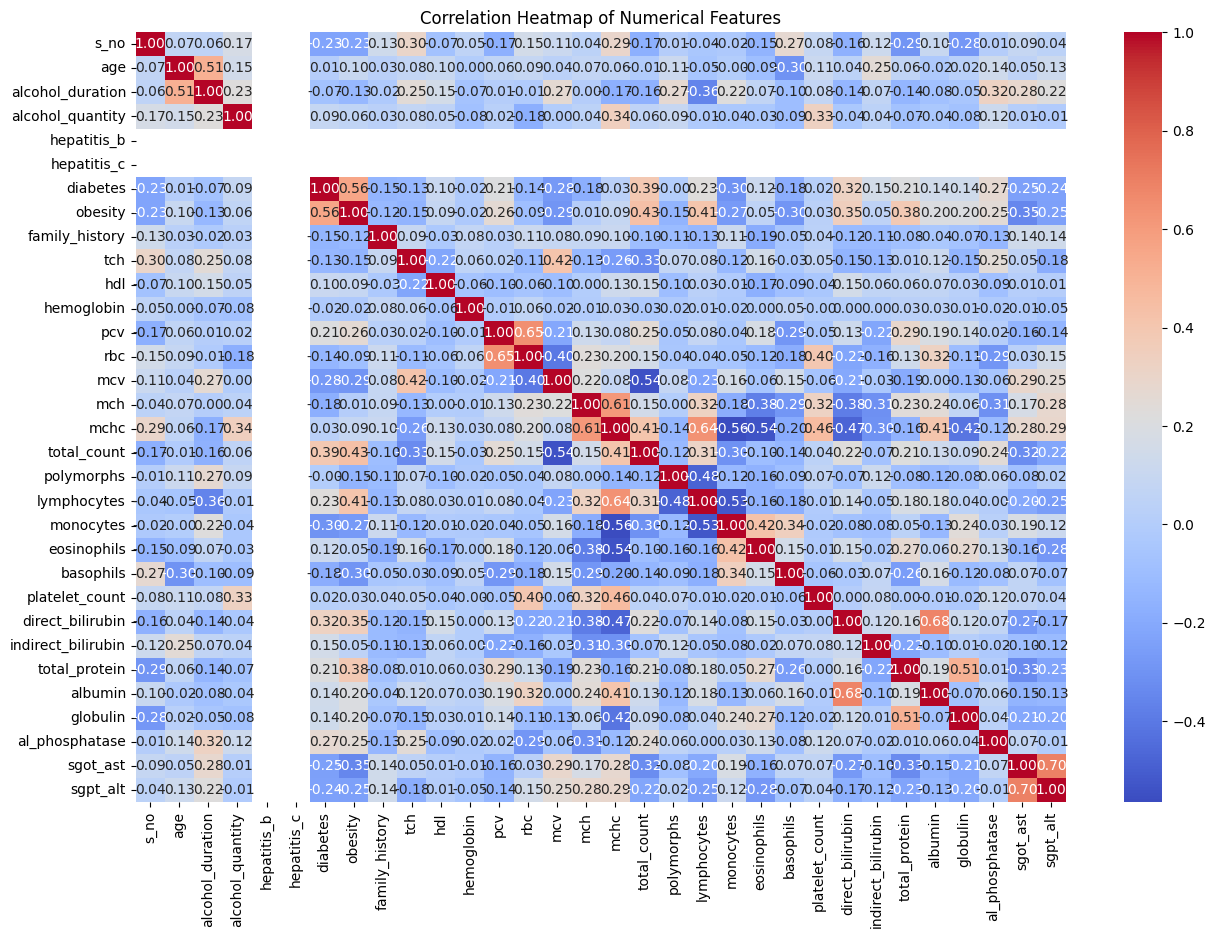

In [ ]:

#select numerical variables
numerical_dataset = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train

,s_no,age,gender,place,alcohol_duration,alcohol_quantity,alcohol_type,hepatitis_b,hepatitis_c,diabetes,...,direct_bilirubin,indirect_bilirubin,total_protein,albumin,globulin,ag_ratio,al_phosphatase,sgot_ast,sgpt_alt,usg_abdomen
936,937,72,female,urban,4,3,branded liquor,0.0,0.0,0,...,1.0,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no
290,291,52,male,urban,12,1,country liquor,0.0,0.0,1,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
544,545,38,male,urban,24,3,both,0.0,0.0,0,...,2.0,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES
275,276,60,female,rural,10,3,both,0.0,0.0,1,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
109,110,50,male,rural,15,1,country liquor,0.0,0.0,1,...,6.0,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,0.0,0.0,1,...,7.9,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES
270,271,60,female,rural,10,3,both,0.0,0.0,1,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
860,861,57,male,rural,25,3,both,0.0,0.0,1,...,3.7,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES
435,436,55,female,rural,20,2,country liquor,0.0,0.0,1,...,2.5,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES


In [ ]:
x_test

,s_no,age,gender,place,alcohol_duration,alcohol_quantity,alcohol_type,hepatitis_b,hepatitis_c,diabetes,...,direct_bilirubin,indirect_bilirubin,total_protein,albumin,globulin,ag_ratio,al_phosphatase,sgot_ast,sgpt_alt,usg_abdomen
199,200,44,male,NaN,25,3,both,0.0,0.0,1,...,2.5,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES
929,930,50,male,NaN,20,3,both,0.0,0.0,0,...,1.2,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no
693,694,42,male,NaN,22,3,both,0.0,0.0,1,...,3.0,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES
798,799,51,male,rural,25,2,country liquor,0.0,0.0,1,...,25.0,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES
874,875,38,male,rural,10,3,both,0.0,0.0,1,...,3.2,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,0.0,0.0,0,...,2.2,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES
33,34,62,male,rural,40,2,both,0.0,0.0,1,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
31,32,62,male,rural,40,2,both,0.0,0.0,1,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
710,711,46,male,rural,18,2,country liquor,0.0,0.0,1,...,1.1,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES


In [ ]:
y_train

,predicted_value
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


In [ ]:
y_test

,predicted_value
199,YES
929,YES
693,YES
798,YES
874,YES
...,...
598,YES
33,YES
31,YES
710,YES


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def models_eval_mm(x_train, y_train, x_test, y_test):
    """
    Trains and evaluates multiple classification models.

    Args:
        x_train: Training data features.
        y_train: Training data target.
        x_test: Testing data features.
        y_test: Testing data target.

    Returns:
        A dictionary containing the trained models and their train/test scores.
    """

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000), # Increase max_iter
        "Logistic Regression CV": LogisticRegressionCV(max_iter=1000), #Increase max_iter
        "XGBClassifier": XGBClassifier(),
        "RidgeClassifier": RidgeClassifier(),
        "KNN Classifier": KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()
    }

    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(x_train, y_train)

        # Make predictions
        y_train_pred = model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB() #Fixed class name and removed extra space

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 1. Load the data (if you haven't already)
dataset = pd.read_excel('HealthCareData.xlsx')  #Uncomment while running and fix file path

# 2. Data Cleaning and Preprocessing
# Rename the columns to be more manageable
dataset.columns = ['s_no', 'age', 'gender', 'place', 'alcohol_duration', 'alcohol_quantity',
                   'alcohol_type', 'hepatitis_b', 'hepatitis_c', 'diabetes', 'blood_pressure',
                   'obesity', 'family_history', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt',
                   'usg_abdomen', 'predicted_value']

# 3. Handle Blood Pressure Column
# Split the blood_pressure column into systolic and diastolic
dataset[['systolic_bp', 'diastolic_bp']] = dataset['blood_pressure'].str.split('/', expand=True)

# Convert systolic and diastolic to numeric
dataset['systolic_bp'] = pd.to_numeric(dataset['systolic_bp'], errors='coerce')
dataset['diastolic_bp'] = pd.to_numeric(dataset['diastolic_bp'], errors='coerce')

# 4. Identify Numerical Columns (manually - adjust this list as needed)
numerical_cols = ['age', 'alcohol_duration', 'alcohol_quantity', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt','systolic_bp', 'diastolic_bp']

# 5. Robust Cleaning of Numerical Columns
for col in numerical_cols:
    # Convert to String, Extract Number, Convert to Numeric
    dataset[col] = dataset[col].astype(str).str.extract('(\d+\.?\d*)', expand=False).astype(float)

# 6. Convert binary categorical features to numerical (0 and 1)
binary_mapping = {'YES': 1, 'NO': 0, 'yes':1, 'no': 0} #add more value if there are more variation of values

for col in ['hepatitis_b', 'hepatitis_c', 'diabetes', 'obesity', 'family_history']:
    dataset[col] = dataset[col].map(binary_mapping).fillna(0)  # Fills NaN with 0

# 7. One-Hot Encode Categorical Features
# Select categorical columns (after any necessary cleaning)
categorical_cols = ['gender', 'place', 'alcohol_type', 'usg_abdomen'] # removed target variable

#Drop blood pressure column
dataset = dataset.drop('blood_pressure', axis=1)

# Create dummy variables (one-hot encoding)
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True) #drop_first reduces multicollinearity

# 8. Separate Features (X) and Target (y)
X = dataset.drop('predicted_value', axis=1)  # Features
y = dataset['predicted_value']  # Target variable

# 9. Handle Missing Values Using Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 10. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into train and test

# Check for missing values after imputation
print("Missing values in X_train after imputation:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_test after imputation:", pd.DataFrame(X_test).isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0
Missing values in y_train: 44
Missing values in y_test: 10
Shape of X_train: (760, 47)
Shape of y_train: (760,)
Shape of X_test: (190, 47)
Shape of y_test: (190,)


In [ ]:
print(len(dataset.columns.to_list()))

48


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Import library for imbalanced data
from imblearn.over_sampling import SMOTE

# 1. Load the data (if you haven't already)
dataset = pd.read_excel('HealthCareData.xlsx')  #Uncomment while running and fix file path

# 2. Data Cleaning and Preprocessing
# Rename the columns to be more manageable
dataset.columns = ['s_no', 'age', 'gender', 'place', 'alcohol_duration', 'alcohol_quantity',
                   'alcohol_type', 'hepatitis_b', 'hepatitis_c', 'diabetes', 'blood_pressure',
                   'obesity', 'family_history', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt',
                   'usg_abdomen', 'predicted_value']

# 3. Handle Blood Pressure Column
# Split the blood_pressure column into systolic and diastolic
dataset[['systolic_bp', 'diastolic_bp']] = dataset['blood_pressure'].str.split('/', expand=True)

# Convert systolic and diastolic to numeric
dataset['systolic_bp'] = pd.to_numeric(dataset['systolic_bp'], errors='coerce')
dataset['diastolic_bp'] = pd.to_numeric(dataset['diastolic_bp'], errors='coerce')

# 4. Convert binary categorical features to numerical (0 and 1)
binary_mapping = {'YES': 1, 'NO': 0, 'yes':1, 'no': 0} #add more value if there are more variation of values

for col in ['hepatitis_b', 'hepatitis_c', 'diabetes', 'obesity', 'family_history','predicted_value']:
    dataset[col] = dataset[col].map(binary_mapping).fillna(0)  # Fills NaN with 0

# 5. Clean LDL Column
numerical_cols = ['age', 'alcohol_duration', 'alcohol_quantity', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt','systolic_bp', 'diastolic_bp']

# 5. Robust Cleaning of Numerical Columns
for col in numerical_cols:
    # Convert to String, Extract Number, Convert to Numeric
    dataset[col] = dataset[col].astype(str).str.extract('(\d+\.?\d*)', expand=False).astype(float)

# 6. One-Hot Encode Categorical Features
# Select categorical columns (after any necessary cleaning)
categorical_cols = ['gender', 'place', 'alcohol_type', 'usg_abdomen'] # removed target variable

#Drop blood pressure column
dataset = dataset.drop('blood_pressure', axis=1)

# Create dummy variables (one-hot encoding)
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True) #drop_first reduces multicollinearity

# 7. Separate Features (X) and Target (y)
X = dataset.drop('predicted_value', axis=1)  # Features
y = dataset['predicted_value']  # Target variable

# 8. Handle Missing Values Using Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 9. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into train and test

# Check for missing values after imputation
print("Missing values in X_train after imputation:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_test after imputation:", pd.DataFrame(X_test).isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# 9. Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", pd.Series(y_train_resampled).value_counts())

# ----------------------------------------------------------------------
# Model Training and Evaluation
# ----------------------------------------------------------------------

# 1. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
report_gnb = classification_report(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)
print("Gaussian Naive Bayes Classification Report:\n", report_gnb)

# 2. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)

# 3. Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", report_lr)

# 4. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Classification Report:\n", report_knn)

Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0
Missing values in y_train: 0
Missing values in y_test: 0
Shape of X_train: (760, 47)
Shape of y_train: (760,)
Shape of X_test: (190, 47)
Shape of y_test: (190,)
Class distribution after SMOTE: predicted_value
0.0    699
1.0    699
Name: count, dtype: int64
Gaussian Naive Bayes Accuracy: 0.34210526315789475
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.08      0.85      0.15        13
         1.0       0.96      0.31      0.46       177

    accuracy                           0.34       190
   macro avg       0.52      0.58      0.31       190
weighted avg       0.90      0.34      0.44       190

Random Forest Accuracy: 0.9315789473684211
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.23      0.32        13
         1.0       0.95      0.98      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Import library for imbalanced data
from imblearn.over_sampling import SMOTE

# 1. Define your function first.
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Trains and evaluates multiple classification models."""

    # Models dictionary
    models = {
        "Gaussian Naive Bayes": GaussianNB(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    results = {}  # Store results
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Print results
        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{report}")
        results[name] = {"accuracy": accuracy, "report": report}

    return results

# 2. Load the data (if you haven't already)
dataset = pd.read_excel('HealthCareData.xlsx')  #Uncomment while running and fix file path

# 2. Data Cleaning and Preprocessing
# Rename the columns to be more manageable
dataset.columns = ['s_no', 'age', 'gender', 'place', 'alcohol_duration', 'alcohol_quantity',
                   'alcohol_type', 'hepatitis_b', 'hepatitis_c', 'diabetes', 'blood_pressure',
                   'obesity', 'family_history', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt',
                   'usg_abdomen', 'predicted_value']

# 3. Handle Blood Pressure Column
# Split the blood_pressure column into systolic and diastolic
dataset[['systolic_bp', 'diastolic_bp']] = dataset['blood_pressure'].str.split('/', expand=True)

# Convert systolic and diastolic to numeric
dataset['systolic_bp'] = pd.to_numeric(dataset['systolic_bp'], errors='coerce')
dataset['diastolic_bp'] = pd.to_numeric(dataset['diastolic_bp'], errors='coerce')

# 4. Convert binary categorical features to numerical (0 and 1)
binary_mapping = {'YES': 1, 'NO': 0, 'yes':1, 'no': 0} #add more value if there are more variation of values

for col in ['hepatitis_b', 'hepatitis_c', 'diabetes', 'obesity', 'family_history','predicted_value']:
    dataset[col] = dataset[col].map(binary_mapping).fillna(0)  # Fills NaN with 0

# 5. Clean LDL Column
numerical_cols = ['age', 'alcohol_duration', 'alcohol_quantity', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin', 'pcv',
                   'rbc', 'mcv', 'mch', 'mchc', 'total_count', 'polymorphs', 'lymphocytes',
                   'monocytes', 'eosinophils', 'basophils', 'platelet_count', 'total_bilirubin',
                   'direct_bilirubin', 'indirect_bilirubin', 'total_protein', 'albumin',
                   'globulin', 'ag_ratio', 'al_phosphatase', 'sgot_ast', 'sgpt_alt','systolic_bp', 'diastolic_bp']

# 5. Robust Cleaning of Numerical Columns
for col in numerical_cols:
    # Convert to String, Extract Number, Convert to Numeric
    dataset[col] = dataset[col].astype(str).str.extract('(\d+\.?\d*)', expand=False).astype(float)

# 6. One-Hot Encode Categorical Features
# Select categorical columns (after any necessary cleaning)
categorical_cols = ['gender', 'place', 'alcohol_type', 'usg_abdomen'] # removed target variable

#Drop blood pressure column
dataset = dataset.drop('blood_pressure', axis=1)

# Create dummy variables (one-hot encoding)
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True) #drop_first reduces multicollinearity

# 7. Separate Features (X) and Target (y)
X = dataset.drop('predicted_value', axis=1)  # Features
y = dataset['predicted_value']  # Target variable

# 8. Handle Missing Values Using Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 9. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into train and test

# 9. Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Call and store result with this one single line.
results = train_and_evaluate_models(X_train_resampled, X_test, y_train_resampled, y_test)

--- Gaussian Naive Bayes ---
Accuracy: 0.34210526315789475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      0.85      0.15        13
         1.0       0.96      0.31      0.46       177

    accuracy                           0.34       190
   macro avg       0.52      0.58      0.31       190
weighted avg       0.90      0.34      0.44       190

--- Random Forest ---
Accuracy: 0.9315789473684211
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.23      0.32        13
         1.0       0.95      0.98      0.96       177

    accuracy                           0.93       190
   macro avg       0.72      0.61      0.64       190
weighted avg       0.92      0.93      0.92       190

--- Logistic Regression ---
Accuracy: 0.7315789473684211
Classification Report:
              precision    recall  f1-score   support

         0.0       0.09      0.31      0.14        13
 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
# And you have a model
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Create randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                           n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", random_search.best_params_)

# Evaluate on the test set (or training set)
print('Train Score:', random_search.score(X_train, y_train))
print('Test Score:', random_search.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters found: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Train Score: 0.9434210526315789
Test Score: 0.9473684210526315


NameError: name 'model' is not defined